<a href="https://colab.research.google.com/github/MonseMontesBocanegra/4105_IntroML/blob/Assignments/Homework2_Monse_MontesBocanegra_801297280.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-28-72e62bbe797a>:33: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(np.square(predictions - y))


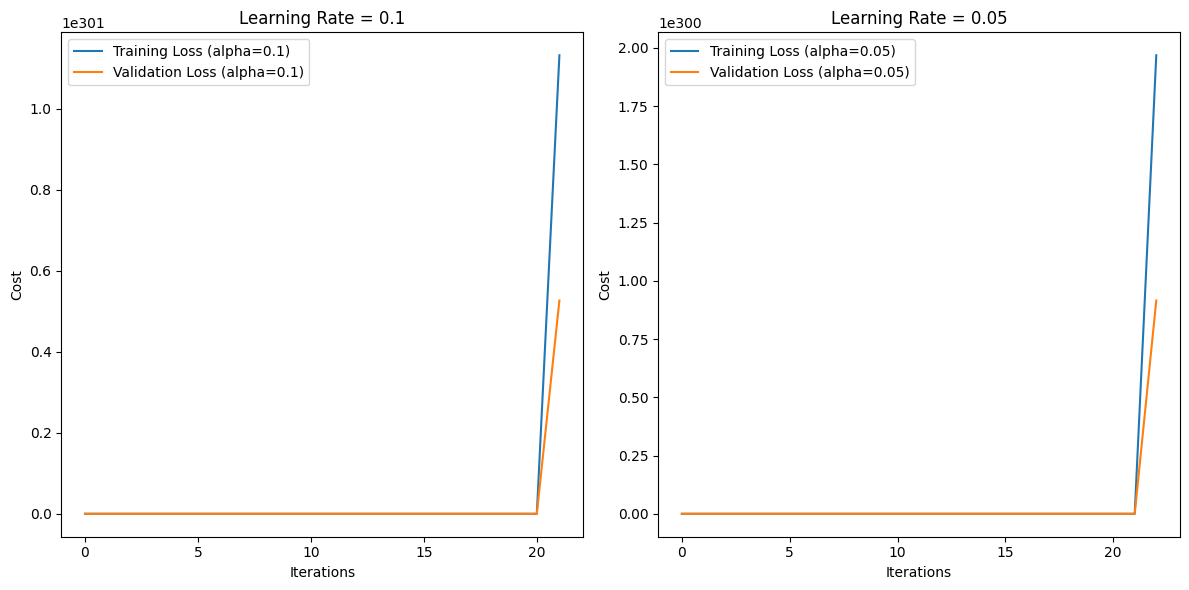

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [28]:

#1a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Dataset
data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')

# 2. Yarget variable (housing price)
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = data[features].replace({'yes': 1, 'no': 0}).values
y = data['price'].values.reshape(-1, 1)

# 3. Split data into training (80%) and validation (20%)
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

# Intercept term (bias)
X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]  # Add bias to X_train
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]        # Add bias to X_val

# 4. Initialize parameters (theta) to zero
theta_init = np.zeros((X_b_train.shape[1], 1))

# 5. Define functions for gradient descent and cost calculation
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, X_val, y_val, theta, alpha, num_iters):
    m = len(y)
    train_cost_history = []
    val_cost_history = []

    for i in range(num_iters):
        # Gradients
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients

        # Training and Validation costs
        train_cost = compute_cost(X, y, theta)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

# 6. Training parameters
num_iters = 1000  # Choose an appropriate number of iterations for training

# Learning rate of 0.1
alpha_1 = 0.1
theta_1, train_cost_history_1, val_cost_history_1 = gradient_descent(X_b_train, y_train, X_b_val, y_val, theta_init.copy(), alpha_1, num_iters)

# Learning rate of 0.03
alpha_2 = 0.05
theta_2, train_cost_history_2, val_cost_history_2 = gradient_descent(X_b_train, y_train, X_b_val, y_val, theta_init.copy(), alpha_2, num_iters)

# 7.Training and Validation loss Plot
plt.figure(figsize=(12, 6))

# Plot for learning rate 0.1
plt.subplot(1, 2, 1)
plt.plot(range(num_iters), train_cost_history_1, label='Training Loss (alpha=0.1)')
plt.plot(range(num_iters), val_cost_history_1, label='Validation Loss (alpha=0.1)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Rate = 0.1')
plt.legend()

# Plot for learning rate 0.05
plt.subplot(1, 2, 2)
plt.plot(range(num_iters), train_cost_history_2, label='Training Loss (alpha=0.05)')
plt.plot(range(num_iters), val_cost_history_2, label='Validation Loss (alpha=0.05)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Rate = 0.05')
plt.legend()

plt.tight_layout()
plt.show()
data.head()

<ipython-input-10-e7500aa6f31a>:35: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(np.square(predictions - y))


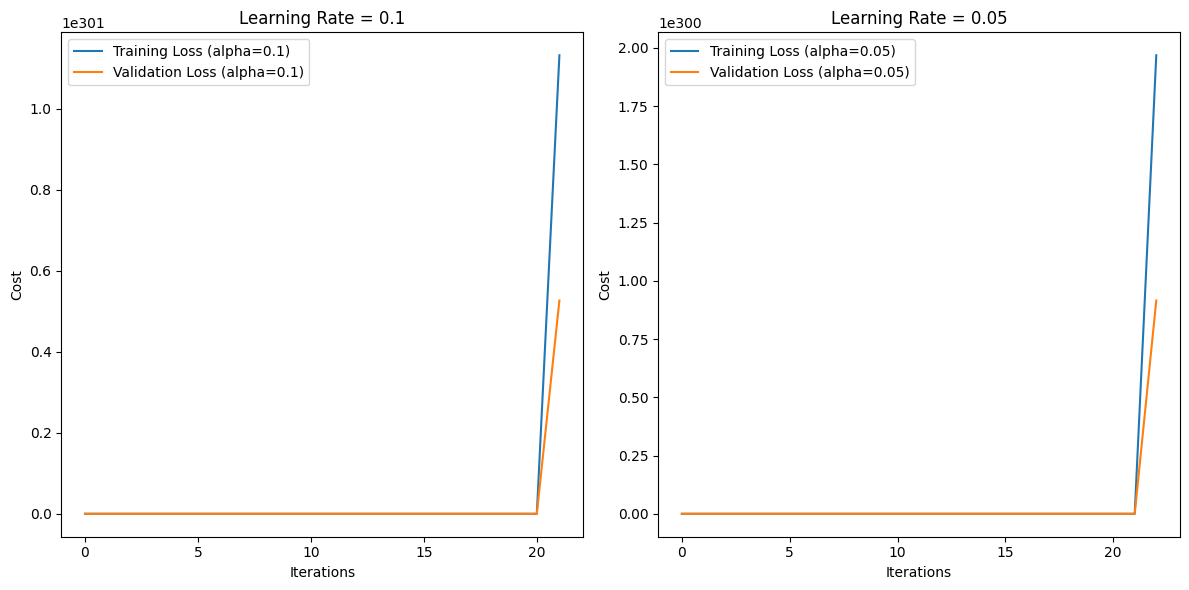

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
# 1b

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Dataset
data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')

# 2. Target variable (housing price)
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = data[features].replace({'yes': 1, 'no': 0}).values
y = data['price'].values.reshape(-1, 1)

# 3. Split data into training (80%) and validation (20%)
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

# Intercept term (bias)
X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

# 4. Initialize parameters (theta) to zero
theta_init = np.zeros((X_b_train.shape[1], 1))

# 5. Define functions for gradient descent and cost calculation
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, X_val, y_val, theta, alpha, num_iters):
    m = len(y)
    train_cost_history = []
    val_cost_history = []

    for i in range(num_iters):
        # Gradients
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients

        #Training and Validation costs
        train_cost = compute_cost(X, y, theta)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

# 6. Training parameters
num_iters = 1000


alpha_1 = 0.1
theta_1, train_cost_history_1, val_cost_history_1 = gradient_descent(X_b_train, y_train, X_b_val, y_val, theta_init.copy(), alpha_1, num_iters)


alpha_2 = 0.05
theta_2, train_cost_history_2, val_cost_history_2 = gradient_descent(X_b_train, y_train, X_b_val, y_val, theta_init.copy(), alpha_2, num_iters)

# 7. Training and Validation loss Plot
plt.figure(figsize=(12, 6))

# Plot for learning rate 0.1
plt.subplot(1, 2, 1)
plt.plot(range(num_iters), train_cost_history_1, label='Training Loss (alpha=0.1)')
plt.plot(range(num_iters), val_cost_history_1, label='Validation Loss (alpha=0.1)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Rate = 0.1')
plt.legend()

# Plot for learning rate 0.05
plt.subplot(1, 2, 2)
plt.plot(range(num_iters), train_cost_history_2, label='Training Loss (alpha=0.05)')
plt.plot(range(num_iters), val_cost_history_2, label='Validation Loss (alpha=0.05)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Rate = 0.05')
plt.legend()

plt.tight_layout()
plt.show()
data.head()

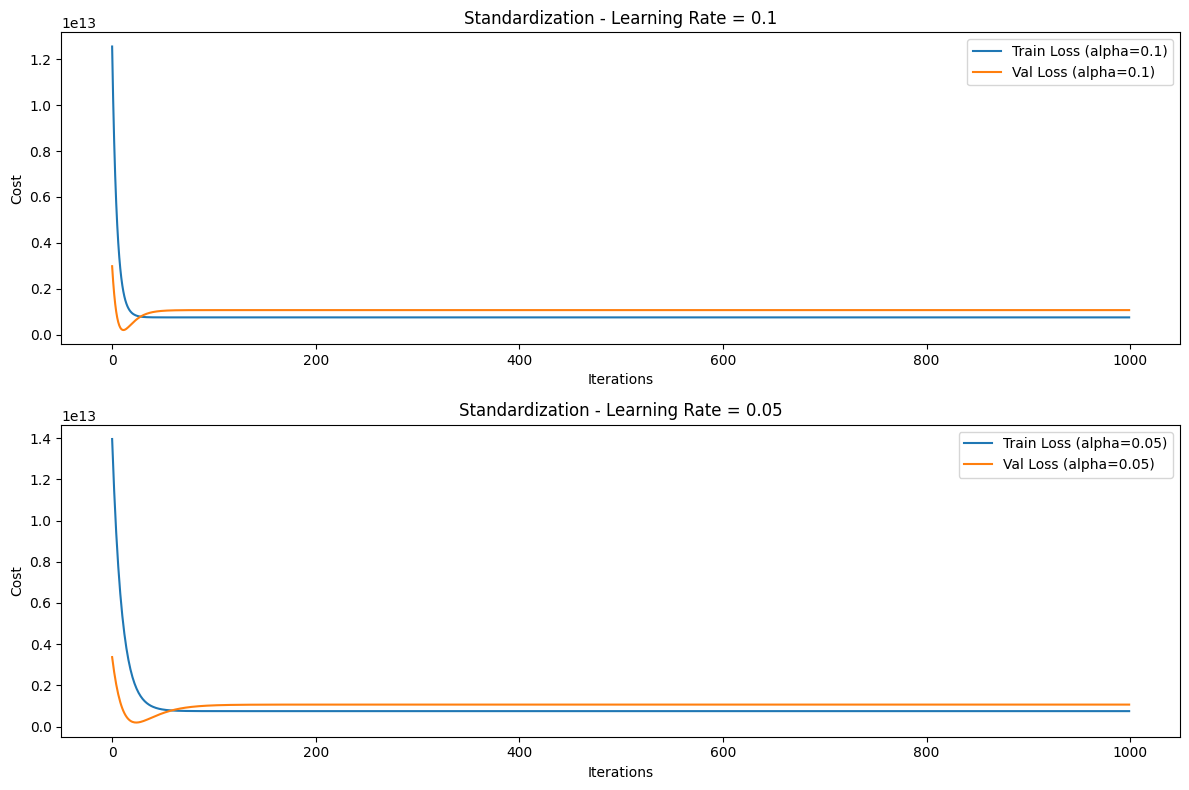

Final Theta (Standardization, alpha=0.1):
[[5277765.91743119]
 [ 630664.98342238]
 [  85675.7892622 ]
 [ 555153.57474789]
 [ 459582.80724355]
 [ 294721.84871837]]
Final Theta (Standardization, alpha=0.05):
[[5277765.91743118]
 [ 630664.98342238]
 [  85675.7892622 ]
 [ 555153.57474789]
 [ 459582.80724355]
 [ 294721.84871837]]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
# 2a

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
y = data['price'].values.reshape(-1, 1)

# Split data into training (80%) and validation (20%)
train_size = int(0.8 * len(data))
X_train = data[features][:train_size]
y_train = y[:train_size]
X_val = data[features][train_size:]
y_val = y[train_size:]

# Function to add bias term
def add_bias(X):
    return np.c_[np.ones((len(X), 1)), X]

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, X_val, y_val, theta, alpha, num_iters):
    m = len(y)
    train_cost_history = []
    val_cost_history = []

    for i in range(num_iters):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients

        train_cost = compute_cost(X, y, theta)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history


theta_init = np.zeros((X_train.shape[1] + 1, 1))

# Scaling and Training with Standardization
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train.replace({'yes': 1, 'no': 0}))
X_val_standard = scaler_standard.transform(X_val.replace({'yes': 1, 'no': 0}))
X_b_train_standard = add_bias(X_train_standard)
X_b_val_standard = add_bias(X_val_standard)

# Training Parameters
num_iters = 1000

# Learning rates for Standardization
alpha_1 = 0.1
theta_standard_1, train_cost_history_standard_1, val_cost_history_standard_1 = gradient_descent(
    X_b_train_standard, y_train, X_b_val_standard, y_val, theta_init.copy(), alpha_1, num_iters)

alpha_2 = 0.05
theta_standard_2, train_cost_history_standard_2, val_cost_history_standard_2 = gradient_descent(
    X_b_train_standard, y_train, X_b_val_standard, y_val, theta_init.copy(), alpha_2, num_iters)

# Plotting for Standardization
plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
plt.plot(range(num_iters), train_cost_history_standard_1, label='Train Loss (alpha=0.1)')
plt.plot(range(num_iters), val_cost_history_standard_1, label='Val Loss (alpha=0.1)')
plt.title('Standardization - Learning Rate = 0.1')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(range(num_iters), train_cost_history_standard_2, label='Train Loss (alpha=0.05)')
plt.plot(range(num_iters), val_cost_history_standard_2, label='Val Loss (alpha=0.05)')
plt.title('Standardization - Learning Rate = 0.05')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

plt.tight_layout()
plt.show()

# Compare final learned parameters (theta) and costs
print("Final Theta (Standardization, alpha=0.1):")
print(theta_standard_1)

print("Final Theta (Standardization, alpha=0.05):")
print(theta_standard_2)
data.head()

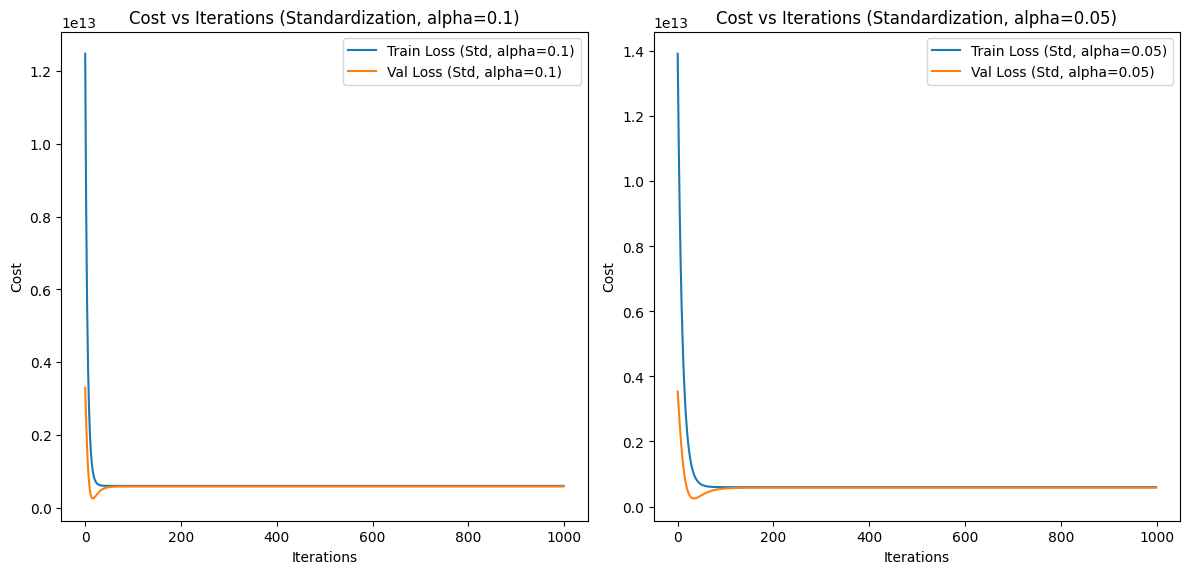

Final Theta (Standardization, alpha=0.1):
[[5277765.91743119]
 [ 507513.20178961]
 [  81263.23954522]
 [ 517961.71192909]
 [ 403175.93731964]
 [ 149828.02226822]
 [ 116529.41072979]
 [ 156559.89423246]
 [ 194204.03263015]
 [ 377745.34165101]
 [ 244926.39594286]
 [ 242363.68003168]]
Final Theta (Standardization, alpha=0.05):
[[5277765.91743118]
 [ 507513.2017684 ]
 [  81263.23957404]
 [ 517961.71194389]
 [ 403175.93726111]
 [ 149828.02227705]
 [ 116529.41075528]
 [ 156559.89418138]
 [ 194204.03263482]
 [ 377745.34167083]
 [ 244926.39593712]
 [ 242363.68004537]]

Final Theta (Normalization, alpha=0.1):
[[2214642.30688134]
 [2912757.3198257 ]
 [ 663826.90997666]
 [2749918.29214511]
 [1309062.46490238]
 [ 571731.421851  ]
 [ 299444.62388289]
 [ 309065.71535286]
 [ 885470.85560099]
 [ 795074.65763215]
 [ 895362.87341027]
 [ 553318.27297069]]
Final Theta (Normalization, alpha=0.05):
[[2185646.29938691]
 [2305326.96226449]
 [ 906183.12603946]
 [2327086.60328492]
 [1352743.07009876]
 [ 680292.

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
# 2b
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')


features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = data[features].replace({'yes': 1, 'no': 0}).values
y = data['price'].values.reshape(-1, 1)

train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:]
y_val = y[train_size:]

# Add a column of ones for the intercept term (bias)
X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]


theta_init = np.zeros((X_b_train.shape[1], 1))


def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, X_val, y_val, theta, alpha, num_iters):
    m = len(y)
    train_cost_history = []
    val_cost_history = []

    for i in range(num_iters):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients

        train_cost = compute_cost(X, y, theta)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

num_iters = 1000

#Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.transform(X_val)

# Add bias to standardized training and validation data
X_b_train_std = np.c_[np.ones((len(X_train_std), 1)), X_train_std]
X_b_val_std = np.c_[np.ones((len(X_val_std), 1)), X_val_std]


alpha_std_1 = 0.1
theta_std_1, train_cost_history_std_1, val_cost_history_std_1 = gradient_descent(X_b_train_std, y_train, X_b_val_std, y_val, theta_init.copy(), alpha_std_1, num_iters)

alpha_std_2 = 0.05
theta_std_2, train_cost_history_std_2, val_cost_history_std_2 = gradient_descent(X_b_train_std, y_train, X_b_val_std, y_val, theta_init.copy(), alpha_std_2, num_iters)

# Normalization
scaler_minmax = MinMaxScaler()
X_train_norm = scaler_minmax.fit_transform(X_train)
X_val_norm = scaler_minmax.transform(X_val)

# Add bias to normalized training and validation data
X_b_train_norm = np.c_[np.ones((len(X_train_norm), 1)), X_train_norm]
X_b_val_norm = np.c_[np.ones((len(X_val_norm), 1)), X_val_norm]


alpha_norm_1 = 0.1
theta_norm_1, train_cost_history_norm_1, val_cost_history_norm_1 = gradient_descent(X_b_train_norm, y_train, X_b_val_norm, y_val, theta_init.copy(), alpha_norm_1, num_iters)

alpha_norm_2 = 0.05
theta_norm_2, train_cost_history_norm_2, val_cost_history_norm_2 = gradient_descent(X_b_train_norm, y_train, X_b_val_norm, y_val, theta_init.copy(), alpha_norm_2, num_iters)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(num_iters), train_cost_history_std_1, label='Train Loss (Std, alpha=0.1)')
plt.plot(range(num_iters), val_cost_history_std_1, label='Val Loss (Std, alpha=0.1)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Standardization, alpha=0.1)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_iters), train_cost_history_std_2, label='Train Loss (Std, alpha=0.05)')
plt.plot(range(num_iters), val_cost_history_std_2, label='Val Loss (Std, alpha=0.05)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Standardization, alpha=0.05)')
plt.legend()

plt.tight_layout()
plt.show()

# 10. Compare and report the final learned parameters (theta) and costs for standardization
print("Final Theta (Standardization, alpha=0.1):")
print(theta_std_1)

print("Final Theta (Standardization, alpha=0.05):")
print(theta_std_2)


# 12. Compare final costs for normalization
print("\nFinal Theta (Normalization, alpha=0.1):")
print(theta_norm_1)

print("Final Theta (Normalization, alpha=0.05):")
print(theta_norm_2)

data.head()

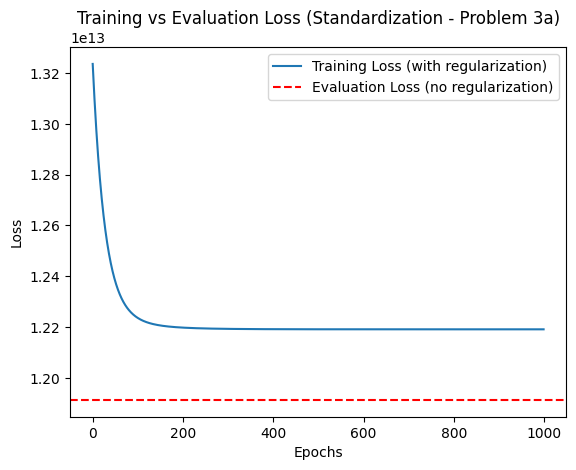

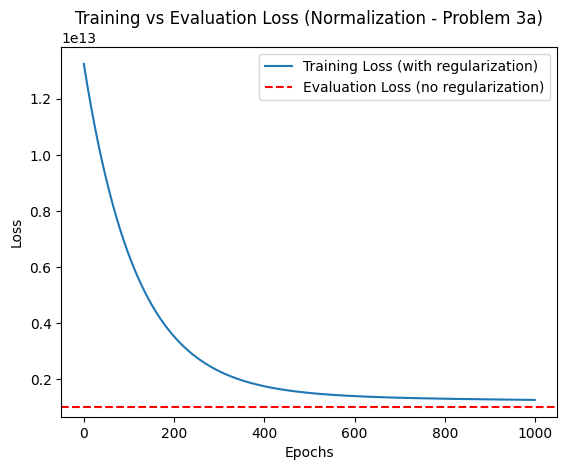

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
#3a
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')


features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = data[features].values
y = data['price'].values.reshape(-1, 1)

scaler_standard = StandardScaler()
scaler_normal = MinMaxScaler()

X_standard = scaler_standard.fit_transform(X)
X_normal = scaler_normal.fit_transform(X)


X_train_std, X_eval_std, y_train, y_eval = train_test_split(X_standard, y, test_size=0.2, random_state=0)
X_train_norm, X_eval_norm, _, _ = train_test_split(X_normal, y, test_size=0.2, random_state=0)

# Gradient descent with regularization (penalty)
def gradient_descent(X, y, learning_rate=0.01, epochs=1000, reg_lambda=0.01):
    m, n = X.shape
    theta = np.zeros((n, 1))
    train_losses = []

    for epoch in range(epochs):
        # Predictions
        y_pred = X @ theta
        error = y_pred - y

        # Training loss with penalty
        loss = (1 / (2 * m)) * np.sum(error ** 2) + (reg_lambda / (2 * m)) * np.sum(theta[1:] ** 2)
        train_losses.append(loss)

        # Gradient computation with regularization
        gradient = (1 / m) * (X.T @ error) + (reg_lambda / m) * np.vstack([[0], theta[1:]])  # No penalty on theta[0]

        # Update the parameters
        theta -= learning_rate * gradient

    return theta, train_losses

# Compute loss for evaluation set (without regularization)
def compute_loss(X, y, theta):
    m = len(y)
    y_pred = X @ theta
    loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return loss

# Plot the training and evaluation losses
def plot_losses(train_losses, eval_loss, title):
    plt.plot(train_losses, label="Training Loss (with regularization)")
    plt.axhline(y=eval_loss, color='r', linestyle='--', label="Evaluation Loss (no regularization)")
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Training with Standardization
theta_std, train_losses_std = gradient_descent(X_train_std, y_train, learning_rate=0.01, epochs=1000, reg_lambda=0.01)
eval_loss_std = compute_loss(X_eval_std, y_eval, theta_std)

# Training with Normalization
theta_norm, train_losses_norm = gradient_descent(X_train_norm, y_train, learning_rate=0.01, epochs=1000, reg_lambda=0.01)
eval_loss_norm = compute_loss(X_eval_norm, y_eval, theta_norm)

# Plot the results for the best input scaling approach
plot_losses(train_losses_std, eval_loss_std, "Training vs Evaluation Loss (Standardization - Problem 3a)")
plot_losses(train_losses_norm, eval_loss_norm, "Training vs Evaluation Loss (Normalization - Problem 3a)")
data.head()

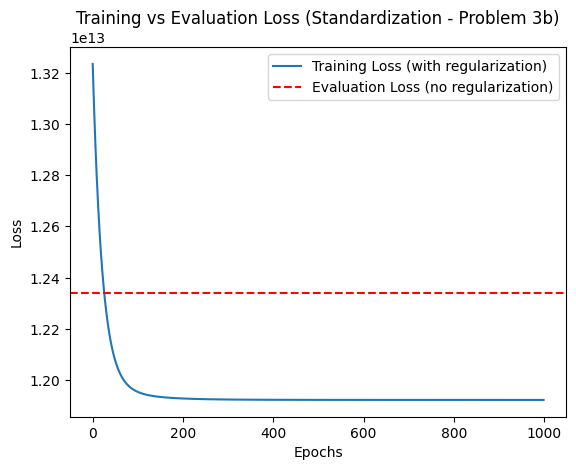

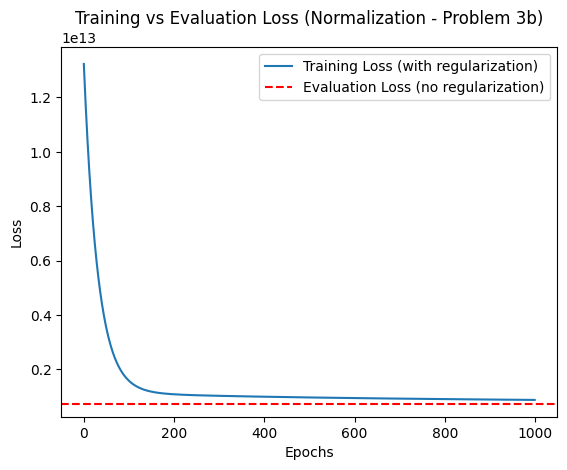

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
#3b
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = data[features]
y = data['price'].values.reshape(-1, 1)


# Normalize and Standardize the data
scaler_standard = StandardScaler()
scaler_normal = MinMaxScaler()

X_standard = scaler_standard.fit_transform(X_encoded)
X_normal = scaler_normal.fit_transform(X_encoded)

# Split into training and evaluation set
X_train_std, X_eval_std, y_train, y_eval = train_test_split(X_standard, y, test_size=0.2, random_state=0)
X_train_norm, X_eval_norm, _, _ = train_test_split(X_normal, y, test_size=0.2, random_state=0)

# Gradient descent with regularization
def gradient_descent(X, y, learning_rate=0.01, epochs=1000, reg_lambda=0.1):
    m, n = X.shape
    theta = np.zeros(n)
    train_losses = []

    for epoch in range(epochs):
        # Predictions
        y_pred = X @ theta
        error = y_pred - y.ravel()

        # Loss with egularization (Training Loss)
        loss = (1 / (2 * m)) * np.sum(error ** 2) + (reg_lambda / (2 * m)) * np.sum(theta ** 2)
        train_losses.append(loss)

        # Gradient computation with regularization
        gradient = (1 / m) * (X.T @ error) + (reg_lambda / m) * theta

        # Update the parameters
        theta -= learning_rate * gradient

    return theta, train_losses

# Compute loss for evaluation set
def compute_loss(X, y, theta):
    m = len(y)
    y_pred = X @ theta
    loss = (1 / (2 * m)) * np.sum((y_pred - y.ravel()) ** 2)
    return loss

# Plot the results for standardized and normalized data
def plot_losses(train_losses, eval_loss, title):
    plt.plot(train_losses, label="Training Loss (with regularization)")
    plt.axhline(y=eval_loss, color='r', linestyle='--', label="Evaluation Loss (no regularization)")
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Training with Standardization
theta_std, train_losses_std = gradient_descent(X_train_std, y_train, learning_rate=0.01, epochs=1000, reg_lambda=0.1)
eval_loss_std = compute_loss(X_eval_std, y_eval, theta_std)

# Training with Normalization
theta_norm, train_losses_norm = gradient_descent(X_train_norm, y_train, learning_rate=0.01, epochs=1000, reg_lambda=0.1)
eval_loss_norm = compute_loss(X_eval_norm, y_eval, theta_norm)

# Plot results
plot_losses(train_losses_std, eval_loss_std, "Training vs Evaluation Loss (Standardization - Problem 3b)")
plot_losses(train_losses_norm, eval_loss_norm, "Training vs Evaluation Loss (Normalization - Problem 3b)")
data.head()